# 11. Sampling Methods

## 11.1.2 Rejection sampling

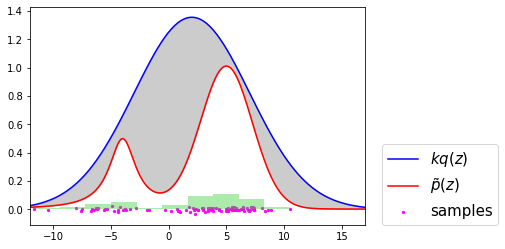

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pd import *
from sampling import *


# target function ~p(z)
func = lambda x : 1 / (2 + (x + 4) ** 2) + np.exp(-(x - 5) ** 2 / 10)
# proposal distribution q(z)
proba = Gaussian(mu=2., var=25.)

''' Rejection sampling '''
sampler = RejectionSampling(target=func, prop=proba, offset=17)
samples = sampler.rvs(size=100)


x = np.linspace(-12, 17, 200)
plt.plot(x, sampler.k * proba.pdf(x), label=r"$kq(z)$", c='b')
plt.plot(x, func(x), label=r"$\tilde{p}(z)$", c='r')
plt.fill_between(x, func(x), sampler.k * proba.pdf(x), color="gray",alpha=0.4)
plt.hist(samples, density=True, alpha=0.4, color='limegreen')
plt.scatter(samples, np.random.normal(scale=.01, size=len(samples)), s=5, label="samples", c='magenta')
plt.xlim(-12, 17)
plt.legend(bbox_to_anchor=(1.05, 0.), loc='lower left', borderaxespad=0, fontsize=15)
plt.show()

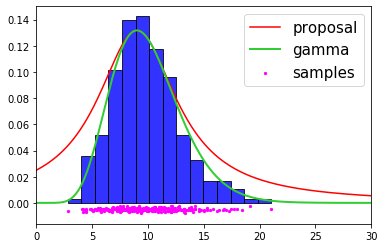

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pd import *
from sampling import *


# target function ~p(z)
func = lambda x : Gamma(alpha=10, beta=1).pdf(x)
# proposal distribution q(z)
proba = Cauchy(x0=10 - 1, gamma=np.sqrt(2 * 10 - 1))

''' Rejection Sampling'''
sampler = RejectionSampling(target=func, prop=proba)
samples = sampler.rvs(size=300)


x = np.linspace(0, 30, 200)
plt.plot(x, sampler.k * proba.pdf(x), label="proposal", c='r')
plt.plot(x, func(x), label="gamma", c='limegreen', lw=2)
plt.hist(samples, bins=15, density=True, color='b', ec='k', alpha=.8)
plt.scatter(samples, np.random.normal(scale=.001, size=len(samples)) - .005, s=5, label="samples", c='magenta')
plt.legend(fontsize=15)
plt.xlim(0, 30)
plt.show()

## 11.1.5 Sampling-importance-resampling

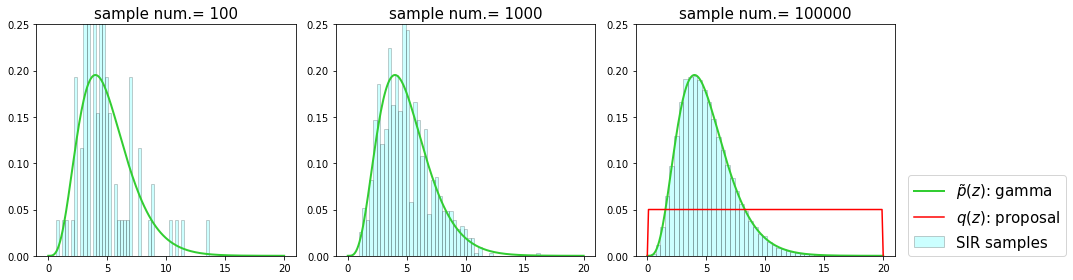

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pd import *
from sampling import SIR


# target function p(z)
func = lambda x : Gamma(alpha=5, beta=1).pdf(x)
# proposal distribution q(z)
proba = Uniform(0, 20)

sampler = SIR(target=func, prop=proba)


x = np.linspace(0, 20, 200)
fig = plt.figure(figsize=(15,4))
for n, n_sample in enumerate([100,1000,100000]):
    ax = fig.add_subplot(1, 3, n+1)
    xs = sampler.rvs(n_sample)
    ax.plot(x, func(x), c='limegreen', label=r'$\tilde{p}(z)$: gamma', lw=2)
    ax.hist(xs, bins=50, color='aqua', label='SIR samples', density=1, ec='k', alpha=.2)
    ax.set_ylim(0, 0.25)
    ax.set_title("sample num.= {}".format(n_sample),fontsize=15)
plt.plot(x, proba.pdf(x), c='r', label=r'$q(z)$: proposal')
plt.legend(bbox_to_anchor=(1.05, 0.), loc='lower left', borderaxespad=0, fontsize=15)
plt.tight_layout()
plt.show()

## 11.2 Markov Chain Monte Carlo

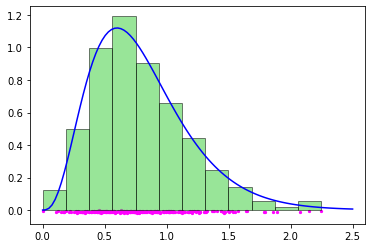

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pd import *
from sampling import *


func = lambda x : Gamma(alpha=4, beta=5).pdf(x) # p(z)


''' sampling with metropolis algorithm'''
sampler = Metropolis(target=func, prop=Gaussian(0., 1.))
samples = sampler.rvs(300)


x = np.linspace(0, 2.5, 100)[:, None]
plt.plot(x, func(x), label="probability density function", c='b')
plt.hist(samples, density=1, alpha=0.5, ec='k', bins=12,
        label="metropolis sample", color='limegreen')
plt.scatter(samples, np.random.normal(scale=0.003, size=len(samples)) - .01,
            label="samples", s=5, c='magenta',)
plt.xlim(-.1, 2.6)
plt.show()

--- population ---

mean
 [0 0]

covariance
 [[3 1]
 [1 3]]


--- samples ---

mean
 [-0.22220807 -0.15600735]

covariance
 [[2.59316476 0.98323264]
 [0.98323264 3.39249916]]


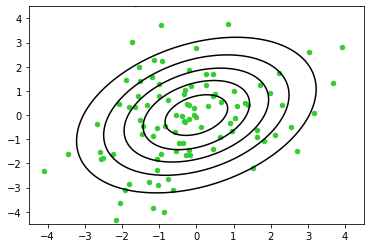

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from deepL_module.base import *
from pd import *
from sampling import *

# center & covariance
mu = np.array([0, 0])
cov = np.array([[3, 1], [1, 3]])


# target function p(z)
func = lambda x :MultivariateGaussian(mu=mu, cov=cov).pdf(x)


# Ellipse orbit
X, Y = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
X_test = np.array([X, Y]).reshape(2, -1).T
Z = func(X_test).reshape(X.shape)


''' Metropolis sampling '''
sampler = Metropolis(target=func, prop=Gaussian(0, 2), dim=2)
samples = sampler.rvs(100, downsample=10)


print("--- population ---\n")
print("mean\n", mu)
print("\ncovariance\n", cov)
print("\n\n--- samples ---\n")
print("mean\n", np.mean(samples, axis=0))
print("\ncovariance\n", np.cov(samples, rowvar=False))

plt.contour(X, Y, Z, levels=5, colors='k', zorder=3)
plt.scatter(samples[:, 0], samples[:, 1], color='limegreen', s=20)
plt.xlim(-4.5, 4.5)
plt.ylim(-4.5, 4.5)
plt.show()

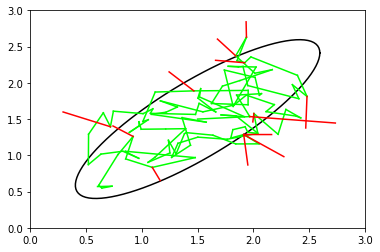

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from pd import *
from sampling import *
from deepL_module.base import *


# center & covariance
mu = np.array([1.5, 1.5])
cov = np.array([[1.2, 1], [1, 1.2]])


# target function p(z)
func = lambda x : MultivariateGaussian(mu=mu, cov=cov).pdf(x)



''' Metropolis sampling '''
sampler = Metropolis(target=func, prop=Gaussian(0, .05), dim=2)
sampler.rvs(100, downsample=1, init_x=1.5)



plt.plot(*ellipse2D_orbit(mu, cov).T, color='k')
plt.plot(*sampler.path['accept'].T, color='#00ff00')
plt.plot(*sampler.path['reject'].T, color='r')
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.show()